## Exercise with perceptron
Find the optimal weights for the two [dimensional dataset](data/rodents.csv) to seperate mice from rats based on data about height and weight. This is a superviced dataset with labels that can be found in the data folder (in this repo)
![](images/rodents.png)

### Part one: general
1. Look at the activation_function and plot the y-values for each x from -5,5 spaced with 0.5 
2. Change the perceptron method from the notebook to use the [numpy.dot() method](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html) in line 12 instead of the lengthy sum() function

### Part two: rodent data
1. Make a new scatter plot with datapoints of weights vs heights. Choose different colors for rats and mice
2. Manually find the optimal linear function to divide the 2 groups (y = aX+b). Plot it on the scatter plot
3. What is the slope and intercept of the linear function?
4. Now change the 'type' column to represent rats as 1 and mice as -1
5. Clean up any rows with null data
6. Use these weights herè [40,-190] to determine if the following 3 animals are mice or rats: 
```
[[231.32446731816555,26.03382997978225],
[17.906954059999567,6.846576762459397],
[230.276522831171,24.077799766119398]]
```
7. Find the (approximately) optimal weights using the perceptron learning algorithm
8. Plot the weightline
9. Plot the division line

[-5.5        -5.49399399 -5.48798799 -5.48198198 -5.47597598]


(-5.5, 0.5, -1.5, 1.5)

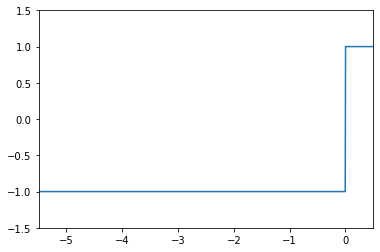

In [72]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def activation_function(x):
    """
    Step function to respond with y = 1 or -1
    Parameter:
    x: An x (numeric) value that will have a corresponding y value of 1 or -1
    """
    if x < 0:
        return -1
    else:
        return 1

rnge = np.linspace(-5.5, 0.5, num=1000)
print(rnge[0:5])

values = [activation_function(i) for i in rnge]
plt.plot(rnge, values)
plt.axis([-5.5, 0.5, -1.5, 1.5])

Formula: y=0.13x-0.11
Slope 0.1276521869901824
Intercept -0.10619222303589537


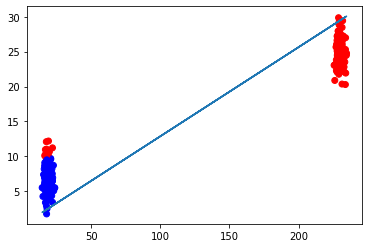

In [73]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

#import dataframe from csv
df = pd.read_csv("../data/rodents.csv", sep=";")

#slope
slope = (max(df["height"])-min(df["height"]))/((max(df["weight"])-min(df["weight"])))
#intercept
intercept = min(df["height"])-slope*min(df["weight"])

print("Formula: y=" + str(round(slope,2)) + "x" + str(round(intercept,2)))
print("Slope " + str(slope))
print("Intercept " + str(intercept))

fig, ax = plt.subplots()

#colors for each type in dataframe
colors = {"rat": "red", "mouse": "blue"}

#scatter data
ax.scatter(df["weight"], df["height"], c=df["type"].map(colors))

#plot median line through scatter points
ax.plot(df["weight"], (slope * df["weight"] - intercept))

In [74]:
#Replace the type column 1 for rats and -1 for mice
df = df.replace(to_replace ="rat", value =1)
df = df.replace(to_replace="mouse", value=-1)

#Clean up rows with null data
df = df.dropna()

df[:10]

,weight,height,type
0,233.479920,23.514130,1
1,231.324467,26.033830,1
2,17.906954,6.846577,-1
3,230.276523,24.077800,1
4,20.360593,6.605983,-1
5,21.605388,6.812460,-1
6,17.857287,11.035404,1
7,22.126466,3.426412,-1
8,16.705946,10.224681,1
10,17.829896,1.760933,-1


In [77]:
#Use these weights herè [40,-190] to determine if the following 3 animals are mice or rats:
weights = [[231.32446731816555,26.03382997978225],
[17.906954059999567,6.846576762459397],
[230.276522831171,24.077799766119398]]

def predict(inp_vec, weights):
    """
    Parameters:
    inp_vec:
        An input vector consisting of sepal length and width
    weights:
        A vector of same length as inp_vec, containing a weight for each input
    return:
        A class label, either 1 for 'setosa' or -1 for 'other'
    """
    class_label_prediction = perceptron(inp_vec, weights)
    return class_label_prediction

learned_values = predict([df["weights"][:3], df["heights"][:3]], weights)

KeyError: 'weights'